In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import scvelo as scv

In [2]:
adata = sc.read('./data_input_1000/Jak2_Hom_WT_Ery.h5ad')

In [3]:
adata.obs

,library,dataset,Condition,batch,doublet_score,n_genes,n_counts,percent_mito,CellSubType,predicted.id,dpt_pseudotime,Ery_prob,Mk_prob,Neu_prob,Mo_prob,Ery_trajectory,Mk_trajectory,Neu_trajectory,Mo_trajectory
AAACCTGAGAGCTGGT-1_SLX11516_SIGAC2,SLX11516_SIGAC2,Jak2_N253,Jak2_WT,0,0.044364,1636.0,4118.0,0.024284,nan,Middle,0.222893,0.999890,1.327988e-05,1.982990e-05,5.572505e-06,Yes,No,No,No
AAACCTGAGCCGGTAA-1_SLX11516_SIGAC2,SLX11516_SIGAC2,Jak2_N253,Jak2_WT,0,0.096070,4386.0,21657.0,0.025304,nan,Late_Ery,0.268090,0.999999,5.373335e-08,1.600912e-07,1.289929e-07,Yes,No,No,No
AAACCTGCAATAGCAA-1_SLX11516_SIGAC2,SLX11516_SIGAC2,Jak2_N253,Jak2_WT,0,0.108491,3114.0,12133.0,0.026786,nan,Middle,0.238405,0.999981,2.733940e-06,3.569625e-06,1.131649e-06,Yes,No,No,No
AAACCTGCAATGTTGC-1_SLX11516_SIGAC2,SLX11516_SIGAC2,Jak2_N253,Jak2_WT,0,0.082917,2076.0,5452.0,0.022194,nan,Middle,0.165495,0.993892,4.076800e-04,7.554831e-04,2.456381e-04,Yes,No,No,No
AAACCTGCAGGATTGG-1_SLX11516_SIGAC2,SLX11516_SIGAC2,Jak2_N253,Jak2_WT,0,0.167464,1695.0,3927.0,0.029030,nan,Early_Ery,0.115010,0.964481,7.631641e-03,3.290917e-03,1.702097e-03,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACACGAGAGT-1_SLX12969_SIGAB8,SLX12969_SIGAB8,Jak2_N277,Jak2_Homo,0,0.023729,5010.0,37664.0,0.029630,nan,Late_Ery,0.316191,0.999996,8.332701e-07,1.895036e-06,8.016846e-07,Yes,No,No,No
TTTGTCAGTTACCAGT-1_SLX12969_SIGAB8,SLX12969_SIGAB8,Jak2_N277,Jak2_Homo,0,0.104306,5099.0,40050.0,0.028489,nan,Late_Ery,0.330536,0.999996,8.648610e-07,1.931909e-06,8.187609e-07,Yes,No,No,No
TTTGTCATCAGAGCTT-1_SLX12969_SIGAB8,SLX12969_SIGAB8,Jak2_N277,Jak2_Homo,0,0.070615,4910.0,37043.0,0.017277,nan,Middle,0.323021,0.999982,4.250417e-06,7.516264e-06,3.121170e-06,Yes,No,No,No
TTTGTCATCCCAGGTG-1_SLX12969_SIGAB8,SLX12969_SIGAB8,Jak2_N277,Jak2_Homo,0,0.074045,2744.0,9100.0,0.030220,nan,HSCs,0.037987,0.352964,1.223719e-01,1.615568e-01,1.840928e-01,Yes,Yes,Yes,Yes


In [4]:
adata_coor = sc.read('./data_input_1000/PMCA_Jak2.h5ad')

In [5]:
adata.obsm = adata_coor[adata.obs_names].obsm.copy()

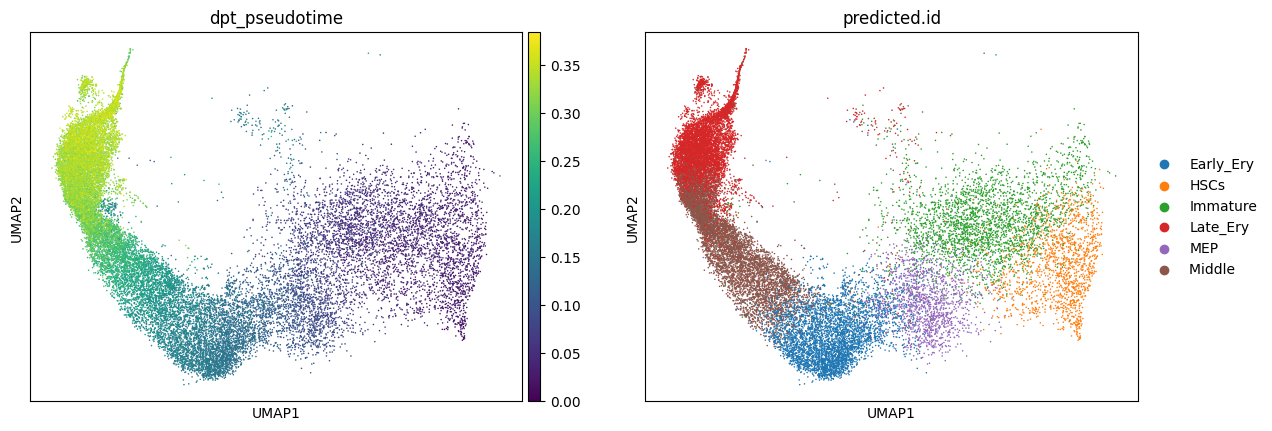

In [6]:
sc.pl.umap(adata,color=['dpt_pseudotime','predicted.id'])

In [7]:
loom_MA = sc.read('./data_input_1000/SLX11516_SIGAB2.loom') 
loom_MA.var_names_make_unique()

loom_MB = sc.read('./data_input_1000/SLX11525_SIGAB3.loom') 
loom_MB.var_names_make_unique()

loom_MC = sc.read('./data_input_1000/SLX12969_SIGAB8.loom') 
loom_MC.var_names_make_unique()


loom_WA = sc.read('./data_input_1000/SLX11516_SIGAC2.loom') 
loom_WA.var_names_make_unique()

loom_WB = sc.read('./data_input_1000/SLX11525_SIGAH2.loom') 
loom_WB.var_names_make_unique()

loom_WC = sc.read('./data_input_1000/SLX12969_SIGAA8.loom') 
loom_WC.var_names_make_unique()

In [8]:
adata_loom = loom_WA.concatenate(loom_WB,loom_WC,loom_MA,loom_MB,loom_MC)

In [9]:
adata_loom.obs

,Clusters,_X,_Y,batch
CellID,,,,
SLX11516_SIGAC2:AAAGCAAAGAGAACAGx-0,10,7.664374,39.435677,0
SLX11516_SIGAC2:AAAGATGAGCGGCTTCx-0,4,45.349907,2.961449,0
SLX11516_SIGAC2:AAAGATGGTGACTACTx-0,7,12.157787,-20.475214,0
SLX11516_SIGAC2:AAACCTGCAGATGGGTx-0,2,27.821291,26.836199,0
SLX11516_SIGAC2:AAACCTGCACAAGTAAx-0,10,10.563196,32.364368,0
...,...,...,...,...
SLX12969_SIGAB8:TTTGCGCTCAGCAACTx-5,0,-25.800327,12.352082,5
SLX12969_SIGAB8:TTTGTCACAGGGAGAGx-5,2,-4.401276,34.972221,5
SLX12969_SIGAB8:TTTGCGCGTATATGGAx-5,3,20.168694,-12.061843,5


In [11]:
list_names = adata_loom.obs_names.copy()

In [12]:
list_names2 = [(name.split('x-')[0]).split(':')[1] + '-1_' + name.split(':')[0] for name in list_names]

In [13]:
adata_loom.obs_names = list_names2

In [14]:
adata_loom = adata_loom[adata.obs_names].copy()

In [15]:
adata_loom.obs = pd.concat([adata_loom.obs,adata.obs],axis=1)

In [16]:
adata_ery = adata_loom[adata.obs.Ery_trajectory == 'Yes'].copy()

In [17]:
adata_ery

AnnData object with n_obs × n_vars = 24154 × 27998
    obs: 'Clusters', '_X', '_Y', 'batch', 'library', 'dataset', 'Condition', 'batch', 'doublet_score', 'n_genes', 'n_counts', 'percent_mito', 'CellSubType', 'predicted.id', 'dpt_pseudotime', 'Ery_prob', 'Mk_prob', 'Neu_prob', 'Mo_prob', 'Ery_trajectory', 'Mk_trajectory', 'Neu_trajectory', 'Mo_trajectory'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [20]:
adata_ery_bu = adata_ery.copy()

In [21]:
de_genes = pd.read_csv('data_input_1000/Jak2_conditionTest_Ery_lfc0.5.txt',index_col=0,sep = '\t')

In [22]:
de_genes =de_genes.index

In [23]:
len(de_genes)

80

In [24]:
de_genes

Index(['Hbb-bs', 'Fabp5', 'Cd48', 'Sapcd1', 'Hba-a2', 'Ptger3', 'Hba-a1',
       'Hbb-bt', 'Hspa8', 'Elane', 'Hsph1', 'Ctsg', 'Gda', 'Msmo1', 'Tfrc',
       'Cpd', 'Bex4', 'Ass1', 'Pim1', 'Pf4', 'Mthfd2', 'Vps13c', 'Gm42749',
       'Mpo', 'Hspa5', 'Osm', '1700097N02Rik', 'Slc9a3r1', 'Cd74', 'Mt2',
       'Banp', 'Ccnd2', 'Rrm2', 'Prkcq', 'Cyp51', 'Igfbp4', 'Hist1h2bc',
       'Ccl9', 'Idi1', 'Ldlr', 'Tmem97', 'Csrp3', 'Sdf2l1', 'Cebpb', 'Sfrp4',
       'Dtnbp1', 'Sqle', 'Cd53', 'Srm', 'Ccdc180', 'Cacybp', 'Ms4a3',
       'AY036118', 'Btg2', 'Satb1', 'Ifi47', 'Gcnt1', 'Nkg7', 'Tmem245',
       'S100a8', 'Stard4', 'Tnfrsf21', 'Fdft1', 'Ptger4', 'Ccne1', 'Slc38a5',
       'H2-Q7', 'Kcnk5', 'Clec12a', 'Emb', 'Ydjc', 'Cited4', 'Cnn3', 'Ccna2',
       'Nt5dc2', 'Hk3', 'Trib2', 'Fdps', 'Cldn13', 'Lat'],
      dtype='object')

In [27]:
scv.pp.filter_and_normalize(adata_ery,min_shared_counts=20, n_top_genes=1000)

Filtered out 18823 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 1000 highly variable genes.
Logarithmized X.


/rds/user/mb2338/hpc-work/LIBS/python/45proteus/lib/python3.8/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


In [28]:
hvg = adata_ery.var_names

In [32]:
adata_ery = adata_ery_bu.copy()

In [33]:
hvg

Index(['Eya1', 'Neurl3', 'Tsga10', 'Aff3', 'Mfsd6', 'Inpp1', 'Klf7', 'Plekhm3',
       'Ikzf2', 'Sp110',
       ...
       'Dock11', 'Sash3', '3830403N18Rik', 'Gdi1', '5430427O19Rik',
       'F630028O10Rik', 'Diaph2', 'Armcx1', 'Bex4', 'Alas2'],
      dtype='object', name='Gene', length=1000)

In [34]:
list_def = hvg.append(de_genes)

In [35]:
list_def = np.unique(list_def)

In [36]:
len(list_def)

1042

In [52]:
adata_ery = adata_ery[:,list_def].copy()

In [53]:
adata_ery

AnnData object with n_obs × n_vars = 24154 × 1042
    obs: 'Clusters', '_X', '_Y', 'batch', 'library', 'dataset', 'Condition', 'batch', 'doublet_score', 'n_genes', 'n_counts', 'percent_mito', 'CellSubType', 'predicted.id', 'dpt_pseudotime', 'Ery_prob', 'Mk_prob', 'Neu_prob', 'Mo_prob', 'Ery_trajectory', 'Mk_trajectory', 'Neu_trajectory', 'Mo_trajectory'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [56]:
scv.pp.filter_and_normalize(adata_ery,min_shared_counts=0)

Normalized count data: X, spliced, unspliced.
Logarithmized X.


/rds/user/mb2338/hpc-work/LIBS/python/45proteus/lib/python3.8/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


In [57]:
adata_ery

AnnData object with n_obs × n_vars = 24154 × 1042
    obs: 'Clusters', '_X', '_Y', 'batch', 'library', 'dataset', 'Condition', 'batch', 'doublet_score', 'n_genes', 'n_counts', 'percent_mito', 'CellSubType', 'predicted.id', 'dpt_pseudotime', 'Ery_prob', 'Mk_prob', 'Neu_prob', 'Mo_prob', 'Ery_trajectory', 'Mk_trajectory', 'Neu_trajectory', 'Mo_trajectory', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'log1p'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [53]:
scv.pp.moments(adata_ery,n_neighbors=30,n_pcs=50)

computing neighbors
    finished (0:00:24) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [62]:
# Create spliced and unspliced matrix
adata_rep1 = adata_ery[adata_ery.obs.dataset == 'Jak2_N258',:].copy()


dfs = pd.DataFrame(adata_rep1.layers['Ms'])
dfs.columns = adata_rep1.var_names
dfs.index = adata_rep1.obs.dpt_pseudotime

dfs_m = dfs.iloc[np.where(adata_rep1.obs.Condition == 'Jak2_Homo')[0],:].copy()
dfs_w = dfs.iloc[np.where(adata_rep1.obs.Condition == 'Jak2_WT')[0],:].copy()

dfu = pd.DataFrame(adata_rep1.layers['Mu'])
dfu.columns = adata_rep1.var_names
dfu.index = adata_rep1.obs.dpt_pseudotime

dfu_m = dfu.iloc[np.where(adata_rep1.obs.Condition == 'Jak2_Homo')[0],:].copy()
dfu_w = dfu.iloc[np.where(adata_rep1.obs.Condition == 'Jak2_WT')[0],:].copy()

dfs_m.to_csv('./data_input_all_samples/erythropoiesis_mut_spl_rep1.csv')
dfu_m.to_csv('./data_input_all_samples/erythropoiesis_mut_unspl_rep1.csv')

dfs_w.to_csv('./data_input_all_samples/erythropoiesis_wt_spl_rep1.csv')
dfu_w.to_csv('./data_input_all_samples/erythropoiesis_wt_unspl_rep1.csv')

In [70]:
adata_rep2 = adata_ery[adata_ery.obs.dataset == 'Jak2_N277',:].copy()

dfs = pd.DataFrame(adata_rep2.layers['Ms'])
dfs.columns = adata_rep2.var_names
dfs.index = adata_rep2.obs.dpt_pseudotime

dfs_m = dfs.iloc[np.where(adata_rep2.obs.Condition == 'Jak2_Homo')[0],:].copy()
dfs_w = dfs.iloc[np.where(adata_rep2.obs.Condition == 'Jak2_WT')[0],:].copy()

dfu = pd.DataFrame(adata_rep2.layers['Mu'])
dfu.columns = adata_rep2.var_names
dfu.index = adata_rep2.obs.dpt_pseudotime

dfu_m = dfu.iloc[np.where(adata_rep2.obs.Condition == 'Jak2_Homo')[0],:].copy()
dfu_w = dfu.iloc[np.where(adata_rep2.obs.Condition == 'Jak2_WT')[0],:].copy()

dfs_m.to_csv('./data_input_all_samples/erythropoiesis_mut_spl_rep2.csv')
dfu_m.to_csv('./data_input_all_samples/erythropoiesis_mut_unspl_rep2.csv')

dfs_w.to_csv('./data_input_all_samples/erythropoiesis_wt_spl_rep2.csv')
dfu_w.to_csv('./data_input_all_samples/erythropoiesis_wt_unspl_rep2.csv')

In [71]:
adata_rep3 = adata_ery[adata_ery.obs.dataset == 'Jak2_N253',:].copy()

dfs = pd.DataFrame(adata_rep3.layers['Ms'])
dfs.columns = adata_rep3.var_names
dfs.index = adata_rep3.obs.dpt_pseudotime

dfs_m = dfs.iloc[np.where(adata_rep3.obs.Condition == 'Jak2_Homo')[0],:].copy()
dfs_w = dfs.iloc[np.where(adata_rep3.obs.Condition == 'Jak2_WT')[0],:].copy()

dfu = pd.DataFrame(adata_rep3.layers['Mu'])
dfu.columns = adata_rep3.var_names
dfu.index = adata_rep3.obs.dpt_pseudotime

dfu_m = dfu.iloc[np.where(adata_rep3.obs.Condition == 'Jak2_Homo')[0],:].copy()
dfu_w = dfu.iloc[np.where(adata_rep3.obs.Condition == 'Jak2_WT')[0],:].copy()

dfs_m.to_csv('./data_input_all_samples/erythropoiesis_mut_spl_rep3.csv')
dfu_m.to_csv('./data_input_all_samples/erythropoiesis_mut_unspl_rep3.csv')

dfs_w.to_csv('./data_input_all_samples/erythropoiesis_wt_spl_rep3.csv')
dfu_w.to_csv('./data_input_all_samples/erythropoiesis_wt_unspl_rep3.csv')